# Prophet을 이용한 주가 예측
- [원문] https://skyeong.net/290
- [Installing fbprophet on colab] https://stackoverflow.com/questions/73142498/installing-fbprophet-on-colab
- [[파이썬] pandas_datareader 오류 Unable to read URL 해결 방법!] https://lapina.tistory.com/149
- [Business forecasting with Facebook Prophet] https://futurice.com/blog/business-forecasting-with-facebook-prophet

# Prophet 설치

In [ ]:
!pip install pystan~=2.14

In [ ]:
!pip install fbprophet

In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install --upgrade pandas-datareader

# 라이브러리 import

In [5]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# 주가 데이터 가져오기

In [6]:
start = "2018-01-01"
end = "2020-12-31"
ticker = "LAC"
df = web.DataReader(name=ticker, data_source="yahoo", start=start, end=end)

# prophet inputs: ds(날짜), y(주가 데이터) 
df["ds"] = pd.to_datetime(df.index, format="%Y-%m-%d")
df["y"] = df["Close"]
df = df[["ds", "y"]]
df

,ds,y
Date,,
2018-01-02,2018-01-02,9.14
2018-01-03,2018-01-03,8.91
2018-01-04,2018-01-04,8.92
2018-01-05,2018-01-05,9.72
2018-01-08,2018-01-08,10.02
...,...,...
2020-12-24,2020-12-24,12.31
2020-12-28,2020-12-28,12.33
2020-12-29,2020-12-29,11.92


# 주가 데이터 시각화

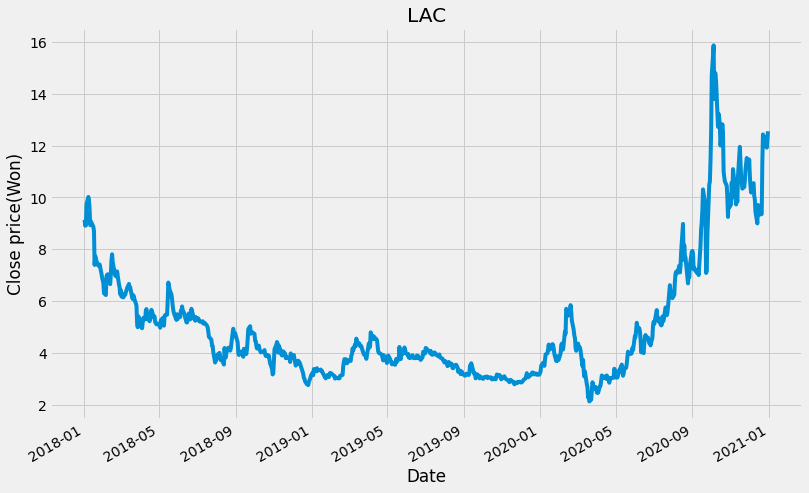

In [7]:
# select y column to plot
ax = df["y"].plot(title=ticker, figsize=(12,8))
ax.set_ylabel("Close price(Won)")
plt.show()

# 모델 적합(학습)

In [9]:
# fit the model
df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(df)

# 향후 1년간의 time stamp 생성

In [11]:
fcast_time = 90 # 1 year: 365
df_forecast = df_prophet.make_future_dataframe(periods=fcast_time, freq="D")
df_forecast.tail(10)

,ds
836,2021-03-22
837,2021-03-23
838,2021-03-24
839,2021-03-25
840,2021-03-26
841,2021-03-27
842,2021-03-28
843,2021-03-29
844,2021-03-30
845,2021-03-31


# predict 메서드를 이용한 주가 예측

In [14]:
df_forecast = df_prophet.predict(df_forecast)

# 예측 결과 확인

In [16]:
df_forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
841,2021-03-27,13.646176,12.397825,14.965403
842,2021-03-28,13.691002,12.472837,15.036168
843,2021-03-29,13.750534,12.436054,15.074453
844,2021-03-30,13.801251,12.607094,15.172315
845,2021-03-31,13.833883,12.570679,15.216961


# 예측값 시각화

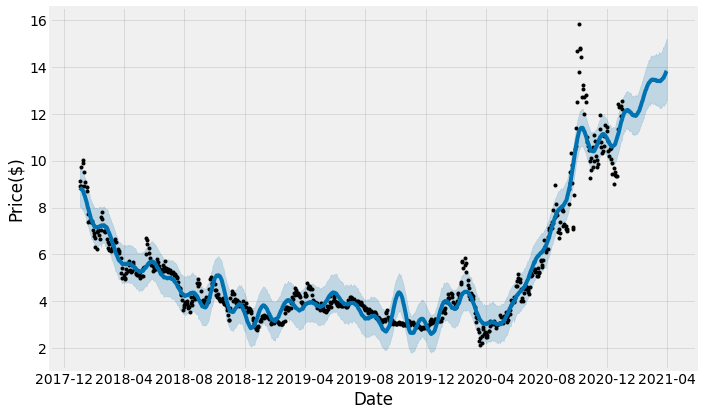

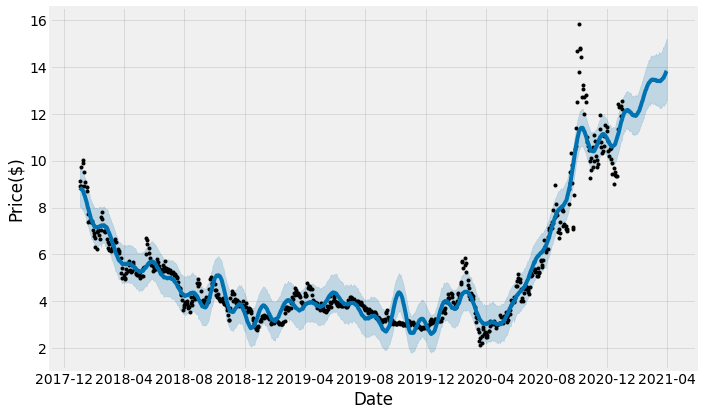

In [18]:
df_prophet.plot(df_forecast, xlabel="Date", ylabel="Price($)")

# 예측 구성요소 확인

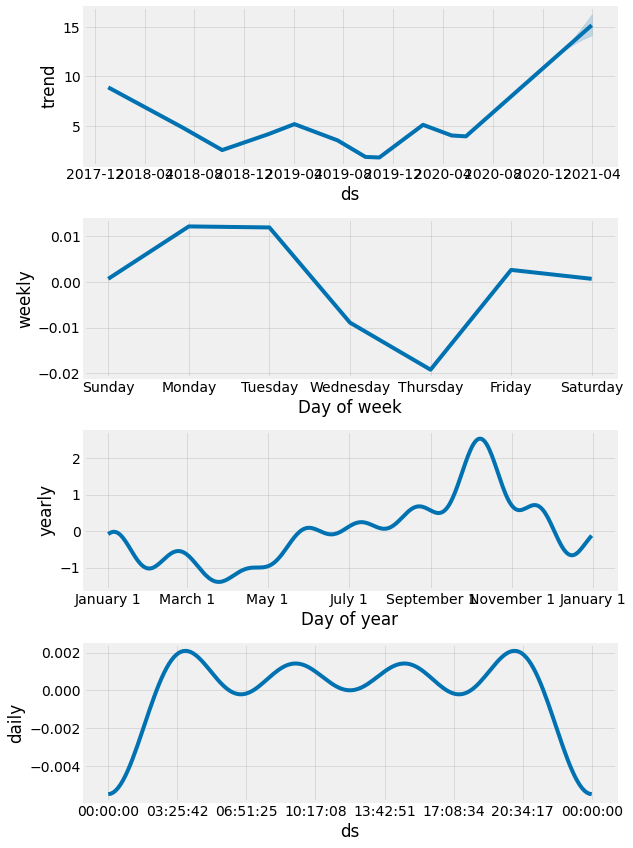

In [19]:
fig2 = df_prophet.plot_components(df_forecast)
plt.show()

# 교차검증 분석

In [23]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(df_prophet, initial=1095,  period=180, horizon=365, unit="days")
df_cv.head()

TypeError: ignored